In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df = pd.read_csv("tvmarketing.csv")

In [11]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [12]:
#1. Import dataset and display first 5 rows
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [13]:
#2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [14]:
#3. Check the shape of the Data Frame (rows, columns)
df.shape


(200, 2)

In [15]:
#4. Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


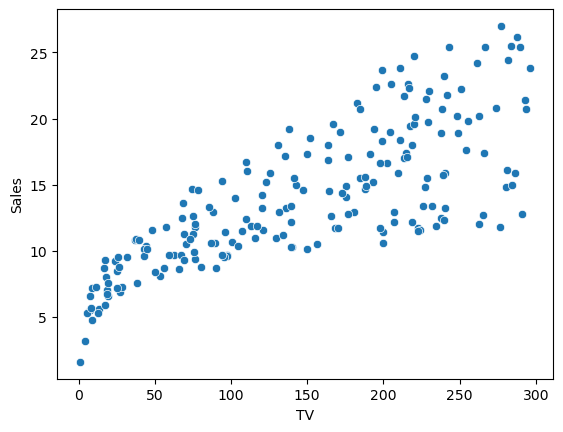

In [16]:
#5. Visualize the relationship between the features and the dependent variable using scatterplots
sns.scatterplot(x = df['TV'],y= df['Sales'])
plt.show()

In [17]:
#6. Prepare X (feature variables) and y (response variable)
x = df[['TV']]
y = df['Sales']

In [18]:
#7.Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test
import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [19]:
#8. Print the shape of train data and test data
print("Training Data Shape (X_train):", X_train.shape)
print("Training Labels Shape (y_train):", y_train.shape)
print("Testing Data Shape (X_test):", X_test.shape)
print("Testing Labels Shape (y_test):", y_test.shape)


Training Data Shape (X_train): (140, 1)
Training Labels Shape (y_train): (140,)
Testing Data Shape (X_test): (60, 1)
Testing Labels Shape (y_test): (60,)


In [20]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values
x = np.array(X_train)
y = np.array(y_train)
mean_x = x.mean()
mean_y = y.mean()
print(f"mean of x is:{mean_x}")
print(f"mean of y is:{mean_y}")
n = len(x)
print(f"length of x is:{n}")
num = 0
den = 0
for i in range(n):
    num += (x[i] - mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
slope = num/den
print(f"slope is:{slope}")
intercept = mean_y - slope * mean_x
print(f"intercept is:{intercept}")
#print(f"Regression Line:{intercept:.2f}+{slope:.2f}x")
#print(f"Regression line: {intercept.item():.2f} + {slope.item():.2f}x")

print(f"regression line:{intercept}+{slope}x")

def predict(a):
    return intercept + slope*a
a = 5
new_predicted = predict(a)
print(f"new predicted value is:{new_predicted}")

mean of x is:150.36214285714286
mean of y is:13.950000000000001
length of x is:140
slope is:[0.0459659]
intercept is:[7.03846806]
regression line:[7.03846806]+[0.0459659]x
new predicted value is:[7.26829758]


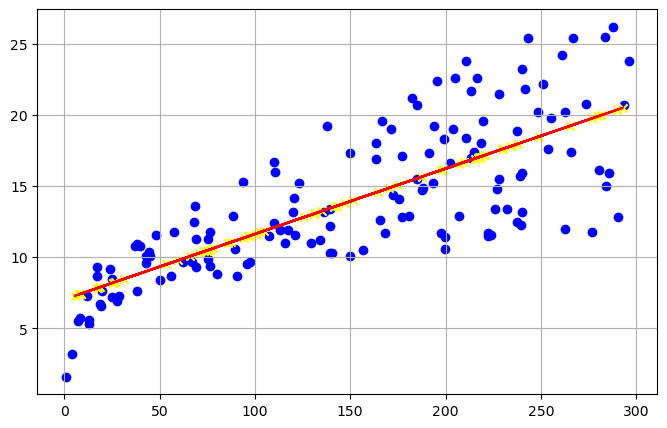

In [39]:
import matplotlib.pyplot as plt
y_regression = [predict(x) for x in X_test.values]
plt.figure(figsize=(8,5))
plt.scatter(x,y,color ="blue",label="actual data",marker="o")
plt.plot(X_test,y_regression,color ="red",label="regression Line")
plt.scatter(X_test,y_regression,color ="yellow",label="regression points",marker="x")
plt.grid(True)

In [43]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
#12.Print the intercept and coefficients
a = model.intercept_
b = model.coef_[0]
print(f"slope (b):{b}")
print(f"intercept (a):{a}")
print(f"regression line : Y = {a:.2f}+{b:.2f}X")

slope (b):0.04596590478533642
intercept (a):7.0384680581094194
regression line : Y = 7.04+0.05X


In [47]:
#13.Make predictions on the testing set - y_pred
y_pred = [predict(x) for x in X_test.values]
print(y_pred)

[array([17.08201825]), array([17.04524553]), array([7.43837143]), array([15.08709799]), array([20.50188157]), array([13.06459818]), array([17.16475688]), array([8.48639406]), array([18.47478517]), array([13.09217772]), array([19.91811458]), array([7.86125775]), array([13.5334504]), array([19.97327366]), array([16.12133084]), array([19.76642709]), array([10.47212115]), array([12.81638229]), array([16.6729217]), array([7.90262707]), array([17.98754658]), array([11.36845629]), array([9.49764396]), array([10.9777461]), array([11.506354]), array([8.27035431]), array([7.39700212]), array([13.80924583]), array([10.07681436]), array([16.54421717]), array([17.00387622]), array([17.17395006]), array([10.54566659]), array([8.21519522]), array([7.28668394]), array([10.28366094]), array([19.22862601]), array([11.8465017]), array([14.5998594]), array([11.6534449]), array([11.4603881]), array([11.04669496]), array([10.41236547]), array([7.82908162]), array([10.49050751]), array([13.60699585]), array(

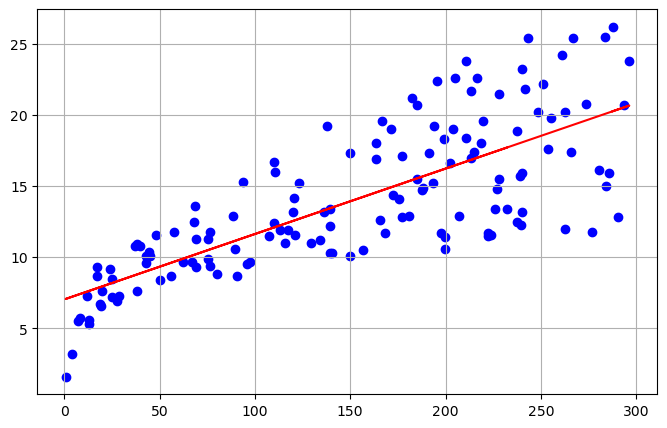

In [51]:
#14.Plot train data and the model
import matplotlib.pyplot as plt
y_regression = [predict(x) for x in X_train.values]
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train,color ="blue",label="actual data",marker="o")
plt.plot(X_train,y_regression,color ="red",label="regression Line")
plt.grid(True)

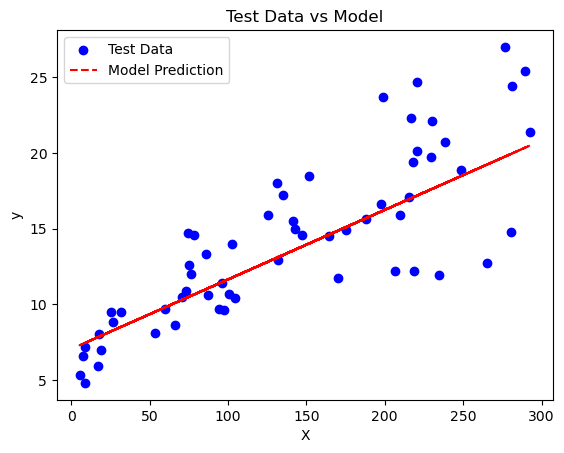

In [49]:
#15.Plot test data and the model
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Data vs Model')
plt.legend()
plt.show()

In [52]:
#16.Print Mean Squared Error and R Squared Value
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the values
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R Squared Value (R²): {r2:.2f}")

Mean Squared Error (MSE): 10.05
R Squared Value (R²): 0.65


In [85]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
ss_total=0
ss_residual =0
ss_total += (y_test - mean_y) ** 2 # Total sum of squares
ss_residual += (y_test - y_pred) ** 2  # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

ValueError: Data must be 1-dimensional, got ndarray of shape (60, 60) instead